In [11]:
import numpy as np                               #Importing numpy, pandas, matplotlib,
import pandas as pd                              #scipy.stats yfinance and os
import matplotlib.pyplot as plt
import scipy.stats as si
import yfinance as yf
import os


In [12]:
initial_data = yf.download("HON", start="2020-10-01", end="2021-10-01")  #HONEYWELL INTERNATIONAL
                                                                         #1 year stock download

[*********************100%***********************]  1 of 1 completed


In [14]:
initial_data.head()                        #showing the first 5 table

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-10-01,166.199997,167.139999,162.119995,163.679993,160.179031,2409300
2020-10-02,161.619995,167.000000,161.350006,165.610001,162.067780,2339900
2020-10-05,166.990005,169.250000,166.740005,168.720001,165.111252,1750000
2020-10-06,169.110001,171.419998,166.619995,166.889999,163.320374,2345800
2020-10-07,168.990005,172.199997,168.520004,171.550003,167.880737,2030200


In [15]:
initial_data.tail()                          #showing the last 5 table

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-09-24,219.740005,220.809998,218.470001,219.190002,218.246826,1949100
2021-09-27,218.940002,219.830002,217.729996,217.899994,216.962372,2199300
2021-09-28,216.619995,218.350006,214.470001,214.970001,214.044983,2654100
2021-09-29,215.830002,216.410004,214.550003,214.919998,213.995209,2109000
2021-09-30,216.169998,216.250000,212.100006,212.279999,211.366562,2934400


In [16]:
initial_data [['Adj Close']].head()           #showing the first 5 adjusted close table

,Adj Close
Date,
2020-10-01,160.179031
2020-10-02,162.067780
2020-10-05,165.111252
2020-10-06,163.320374
2020-10-07,167.880737


In [17]:
initial_data[['Adj Close']].tail()         #showing the last 5 adjusted close table

,Adj Close
Date,
2021-09-24,218.246826
2021-09-27,216.962372
2021-09-28,214.044983
2021-09-29,213.995209
2021-09-30,211.366562


In [18]:
data =  initial_data[['Adj Close']]
data.describe()                         #setting up the dataframe to describe the data

,Adj Close
count,252.000000
mean,210.016533
std,17.880606
min,157.712967
25%,202.150520
50%,213.985245
75%,223.614395
max,232.734222


# MOVEMENT OF HONEYWELL INTERNATIONAL STOCK OVER 1 YEAR

array([<AxesSubplot:xlabel='Date'>], dtype=object)

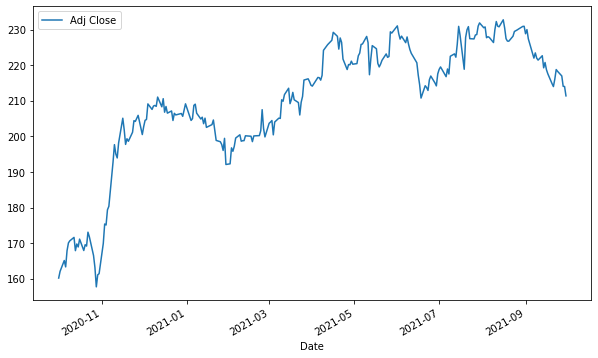

In [101]:
data.plot(figsize=(10, 6), subplots=True)

# MOVEMENT OF LOG_RETURN CUMSUM

In [21]:
log_return = np.log(data / data.shift(1))

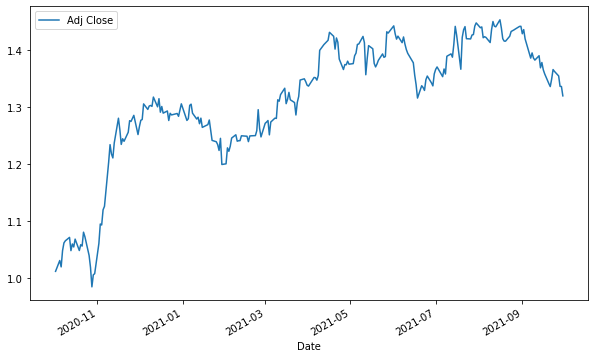

In [102]:
log_return.cumsum().apply(np.exp).plot(figsize=(10, 6));       #cumulative log_return of tsla

# volatility

12 Months Annualized volatility

In [23]:
log_return = np.log(data / data.shift(1))

In [29]:
vol = np.sqrt(252) * log_return.std()                        #HONEYWELL INTERNATIONAL INC annualised volatility
print('The annualised volatility is', round(vol*100,2), '%')

The annualised volatility is Adj Close    22.22
dtype: float64 %


First 6 Months Annualized volatility

In [34]:
six = round(data['Adj Close'][:125].pct_change().apply(lambda x: np.log(1+x)).std() * np.sqrt(252), 4)
print(f"months annualized volatility is {six*100} %")

months annualized volatility is 25.169999999999998 %


# RESAMPLING DATA

In [52]:
data.resample('1w', label='right').last().head()     #resampling with last one week trading data

,Adj Close
Date,
2020-10-04,162.067764
2020-10-11,170.650192
2020-10-18,171.119934
2020-10-25,171.785370
2020-11-01,161.421875


In [53]:
data.resample('1m', label='right').last().head()     #resampling with last one week trading data

,Adj Close
Date,
2020-10-31,161.421875
2020-11-30,200.493958
2020-12-31,209.126450
2021-01-31,192.087616
2021-02-28,199.830994


<AxesSubplot:xlabel='Date'>

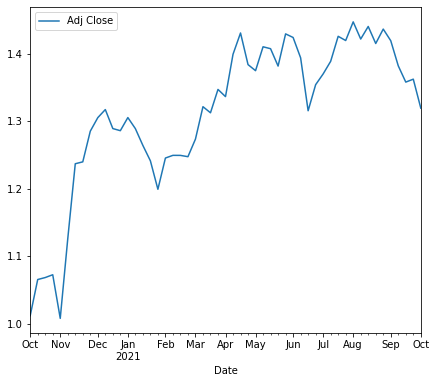

In [103]:
log_return.cumsum().apply(np.exp). resample('1w', label='right').last().plot(figsize=(7, 6))  
#figure for 1week resampling data

<AxesSubplot:xlabel='Date'>

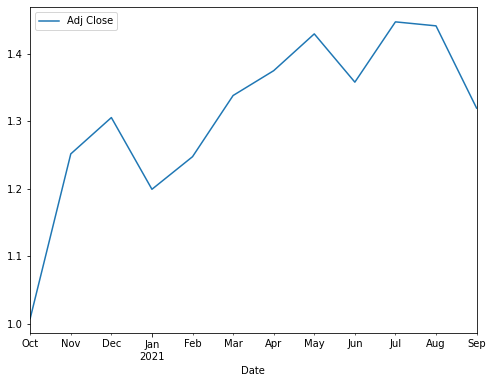

In [104]:
log_return.cumsum().apply(np.exp). resample('1m', label='right').last().plot(figsize=(8, 6))  
#figure for 1month resampling data

# BINOMIAL TREE

#    QUESTION 2

# Creating a binomial price tree

DATE ENTRIES FOR BINOMIAL TREE

In [56]:
S = initial_data['Adj Close'][-1]
print('The spot price is', round(S,2))

The spot price is 211.37


In [105]:
S0 = 211.37           # spot stock price
K = 216               # strike
T = 1                  # maturity 
r = 0.0145                  # risk free rate 
sig = 0.2222             # diffusion coefficient or volatility
N = 5                    # number of periods or number of time steps in Binomial Tree 
payoff = "put"           # payoff

In [106]:
dT = float(T) / N                             # Delta t
u = np.exp(sig * np.sqrt(dT))                 # up factor
d = 1.0 / u 

In [107]:
S = np.zeros((N + 1, N + 1))
S[0, 0] = S0
z = 1
for t in range(1, N + 1):
    for i in range(z):
        S[i, t] = S[i, t-1] * u
        S[i+1, t] = S[i, t-1] * d
    z += 1

In [108]:
S

array([[211.37      , 233.4530563 , 257.84325825, 284.7816468 ,
        314.53444587, 347.39569334],
       [  0.        , 191.37584921, 211.37      , 233.4530563 ,
        257.84325825, 284.7816468 ],
       [  0.        ,   0.        , 173.27300781, 191.37584921,
        211.37      , 233.4530563 ],
       [  0.        ,   0.        ,   0.        , 156.88257092,
        173.27300781, 191.37584921],
       [  0.        ,   0.        ,   0.        ,   0.        ,
        142.04255682, 156.88257092],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        , 128.60630617]])

In [109]:
a = np.exp(r * dT)    # risk free compound return
p = (a - d)/ (u - d)  # risk neutral up probability
q = 1.0 - p           # risk neutral down probability
p

0.4897666667064878

# Find the option value at each of the binomial tree final node¶

In [110]:
S_T = S[:,-1]
V = np.zeros((N + 1, N + 1))
if payoff =="call":
    V[:,-1] = np.maximum(S_T-K, 0.0)
elif payoff =="put":
    V[:,-1] = np.maximum(K-S_T, 0.0)
V

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        24.62415079],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        59.11742908],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        87.39369383]])

# European Option¶

In [111]:
# for European Option
for j in range(N-1, -1, -1):
    for i in range(j+1):
        V[i,j] = np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1])
V

array([[20.38230394, 10.29454331,  3.24257016,  0.        ,  0.        ,
         0.        ],
       [ 0.        , 30.18143513, 17.12224088,  6.37352963,  0.        ,
         0.        ],
       [ 0.        ,  0.        , 42.88858461, 27.53725438, 12.52767954,
         0.        ],
       [ 0.        ,  0.        ,  0.        , 57.86825519, 42.10149959,
        24.62415079],
       [ 0.        ,  0.        ,  0.        ,  0.        , 73.33195058,
        59.11742908],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        87.39369383]])

In [112]:
print('European ' + payoff, str( V[0,0]))

European put 20.38230394375547


# Monte Carlo Simulation

In [65]:
def mcs_simulation_np(p):
    M = p
    I = p
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * rn[t]) 
    return S

In [113]:
T = 1
r = 0.0145
sigma = 0.2222
S0 = 211.37
K = 216

In [114]:
S = mcs_simulation_np(10000)

In [115]:
S = np.transpose(S)
S

array([[211.37      , 210.84762503, 210.6805595 , ..., 278.0587539 ,
        277.96846683, 278.29021508],
       [211.37      , 211.83645246, 212.08037734, ..., 176.51387367,
        176.23213948, 176.97753643],
       [211.37      , 211.2012534 , 211.80879152, ..., 308.11752784,
        308.92735437, 309.71809425],
       ...,
       [211.37      , 212.17041012, 212.01300911, ..., 200.43724872,
        200.2171568 , 200.30530047],
       [211.37      , 211.38388164, 211.04270414, ..., 189.20278314,
        190.04590938, 189.79734141],
       [211.37      , 211.46289292, 211.15056801, ..., 238.79453584,
        239.65279722, 239.28201161]])

Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-preiod values')

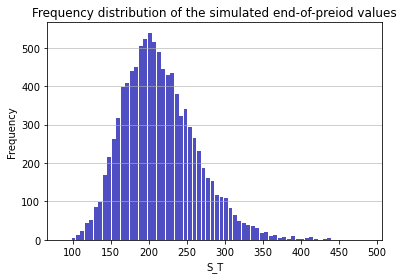

In [116]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x=S[:,-1], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('S_T')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the simulated end-of-preiod values')

In [118]:
p = np.mean(np.maximum(K - S[:,-1],0))
print('European put', str(p))

European put 19.677866247162523


# GREEK

In [146]:
from mpl_toolkits.mplot3d import Axes3D

In [147]:
import scipy.stats as si

Surface of Delta

In [148]:
data.loc["2021-09-30"]["Adj Close"]

211.36656188964844

In [82]:
S = 211.36656188964844
K = 216
T = 1
vol = 0.2222
q = 0.0192
r = 0.0145

In [83]:
def delta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        delta = np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0)
    elif payoff == "put":
        delta =  - np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0)
    
    return delta

In [84]:
delta(S, K, T, r, q, vol, 'put')

-0.49348237001611883

In [99]:
S = np.linspace(150, 300, 12)
T = np.linspace(0.5, 2, 51)
Delta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Delta[i,j] = delta(S[j], K, T[i], r, q, vol, 'put')

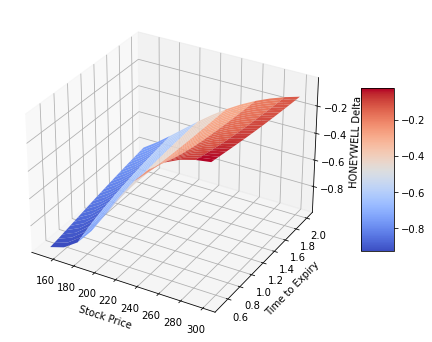

In [100]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Delta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('HONEYWELL Delta')
fig.colorbar(surf, shrink=0.5, aspect=5);

surface of gamma

In [61]:
S = 211.36656188964844
K = 216
T = 1
vol = 0.2222
q = 0.0192
r = 0.0145

In [62]:
def gamma(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * np.sqrt(T))
    
    return gamma

In [63]:
gamma(S, K, T, r, q, vol, 'put')

0.008332562729486338

In [115]:
S = np.linspace(50, 300, 250)
T = np.linspace(0.5, 2, 51)
Gamma = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Gamma[i,j] = gamma(S[j], K, T[i], r, q, vol, 'put')

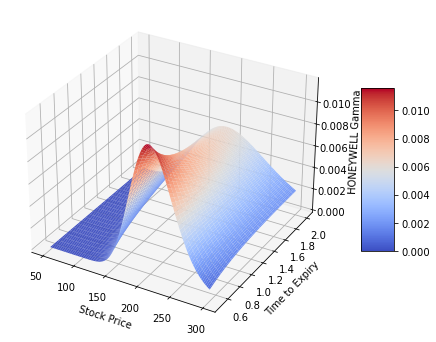

In [116]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Gamma, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('HONEYWELL Gamma')
fig.colorbar(surf, shrink=0.5, aspect=5);

SURFACE OF SPEED

In [51]:
S = 211.36656188964844
K = 216
T = 1
vol = 0.2222
q = 0.0192
r = 0.0145

In [52]:
def speed(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    speed = - np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / ((vol **2) * (S**2) * np.sqrt(T)) * (d1 + vol * np.sqrt(T))
    
    return speed

In [53]:
speed(S, K, T, r, q, vol, 'put')

-3.806646253548124e-05

In [117]:
S = np.linspace(50, 150, 51)
T = np.linspace(0.5, 2, 51)
Speed = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Speed[i,j] = speed(S[j], 105, T[i], 0.04, 0.02, 0.3, 'put')

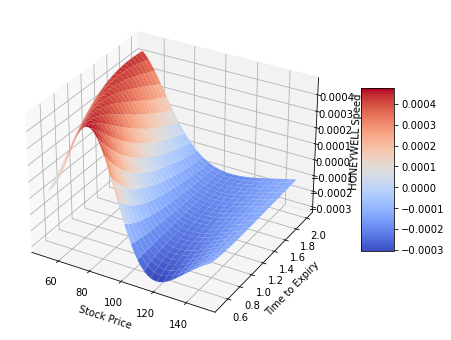

In [118]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Speed, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('HONEYWELL Speed')
fig.colorbar(surf, shrink=0.5, aspect=5);

THETA SURFACE

In [46]:
S = 211.36656188964844
K = 216
T = 1
vol = 0.2222
q = 0.0192
r = 0.0145

In [47]:
def theta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        theta = vol * S * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        theta = vol * S * np.exp(-q * T) * si.norm.pdf(-d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return theta

In [48]:
theta(S, K, T, r, q, vol, 'put')

9.011234161262285

In [119]:
S = np.linspace(50, 150, 51)
T = np.linspace(0.5, 2, 51)
Theta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Theta[i,j] = theta(S[j], 105, T[i], 0.04, 0.02, 0.3, 'put')

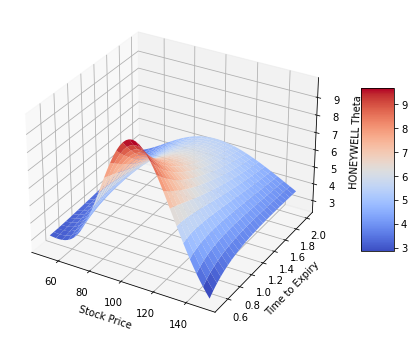

In [120]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Theta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('HONEYWELL Theta')
fig.colorbar(surf, shrink=0.5, aspect=5);

Surface of Vega

In [66]:
S = 211.36656188964844
K = 216
T = 1
vol = 0.2222
q = 0.0192
r = 0.0145

In [67]:
def vega(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    vega = S * np.sqrt(T) * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0)
    
    return vega

In [68]:
vega(S, K, T, r, q, vol, 'put')

82.71708339343886

In [121]:
S = np.linspace(50, 150, 51)
T = np.linspace(0.5, 2, 51)
Vega = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Vega[i,j] = vega(S[j], 105, T[i], 0.04, 0.02, 0.3, 'put')

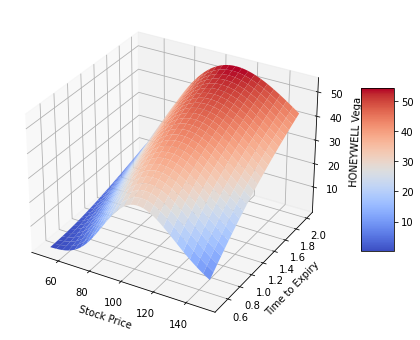

In [122]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Vega, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('HONEYWELL Vega')
fig.colorbar(surf, shrink=0.5, aspect=5);